# **Rupam Das**
## WBSU, M.Sc. Electronics
### dasrupam59@gmail.com

_____________________________________________________________________________________________________________________________________________

## Code Clause Internship Task

## Task 2 :- Customer Segmentations and Market Basket Analysis Using  Apriori algorithm

-------------------------------------------------------------------------------------------------------------------------------------------

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px



Import data file

In [2]:
df1 = pd.read_csv('Online Retail csv.csv')

In [3]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df = pd.read_csv('Online Retail csv.csv',  parse_dates=['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541909, 8)

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


{'whiskers': [<matplotlib.lines.Line2D at 0x25b005995e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25b00599c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b00599190>],
 'medians': [<matplotlib.lines.Line2D at 0x25b0035b3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b0035b730>],
 'means': []}

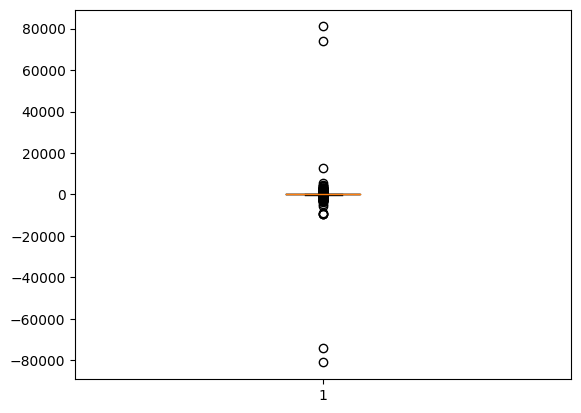

In [10]:
plt.boxplot(df['Quantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25b00c22460>,
 'caps': [<matplotlib.lines.Line2D at 0x25b00c22b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b00c220d0>],
 'medians': [<matplotlib.lines.Line2D at 0x25b00c2e2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b00c2e670>],
 'means': []}

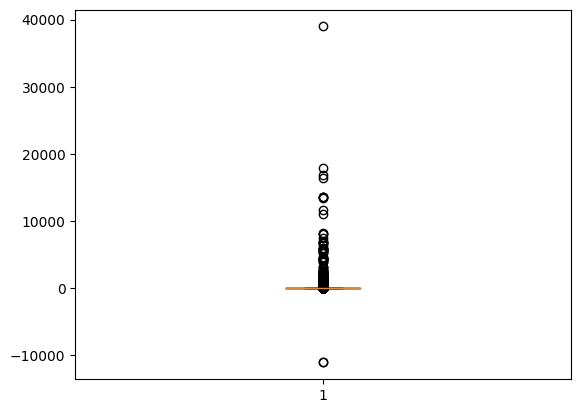

In [11]:
plt.boxplot(df['UnitPrice'])

# Data Cleansing

Ensure that the data type in the InvoiceNo column is in the form of a string.

In [12]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [13]:
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


InvoiceNo that starts with the letter 'C' indicates a canceled transaction. We will delete this data, because we will analyze only successful transactions.

In [14]:
#Delete canceled transaction rows
df = df[~df['InvoiceNo'].str.contains('C')]

In [15]:
df.shape

(532621, 8)

In [16]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,134697,25.289465
1,Description,1454,0.272990
2,InvoiceNo,0,0.000000
3,StockCode,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Country,0,0.000000


In [17]:
df = df.dropna(subset = ['CustomerID', 'Description'])

In [18]:
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


In [19]:
#Remove spaces at the beginning or end of sentences
df['Description'] = df['Description'].str.strip()

In [20]:
df.shape

(397924, 8)

In [21]:
df.info()
df['CustomerID'] = df['CustomerID'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [22]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# Exploratory Data Analysis


Most selling product

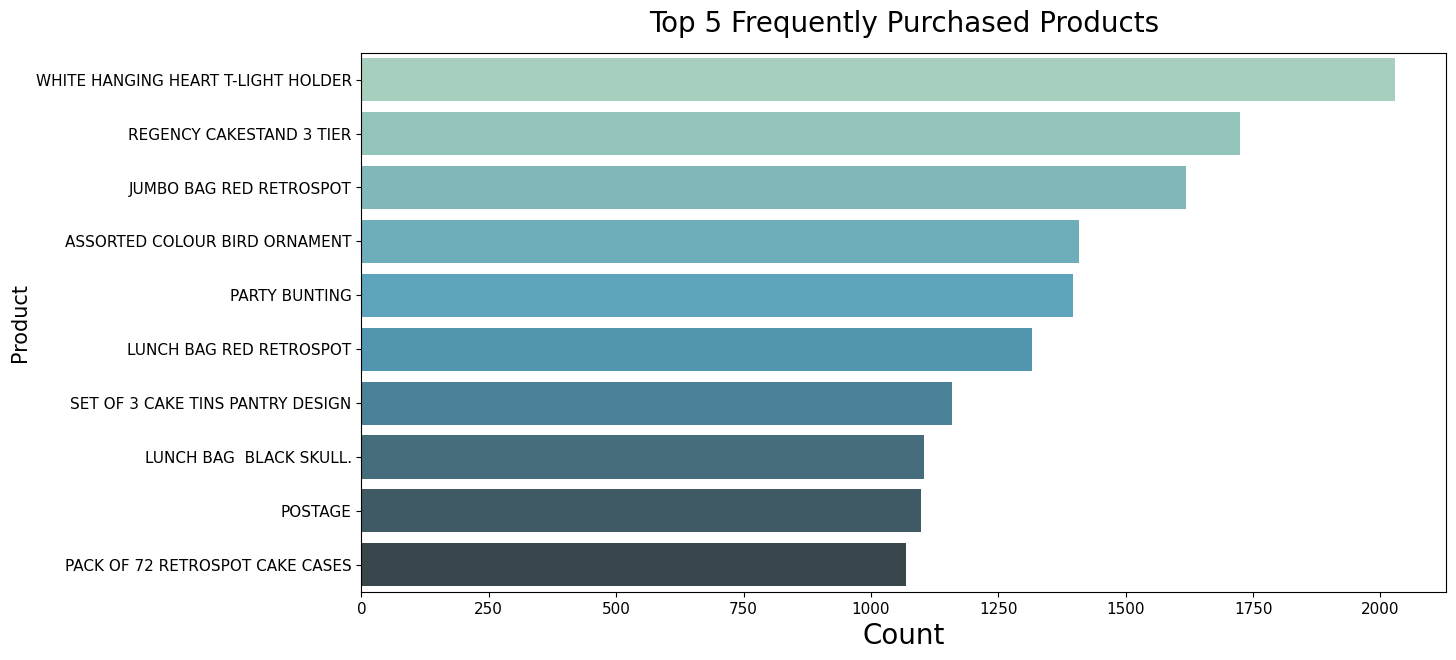

In [31]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['Description'], 
                   order = df["Description"].value_counts().iloc[:10].index, 
                   palette = "GnBu_d")
ax.set_title("Top 5 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 20)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

### Orders per month 

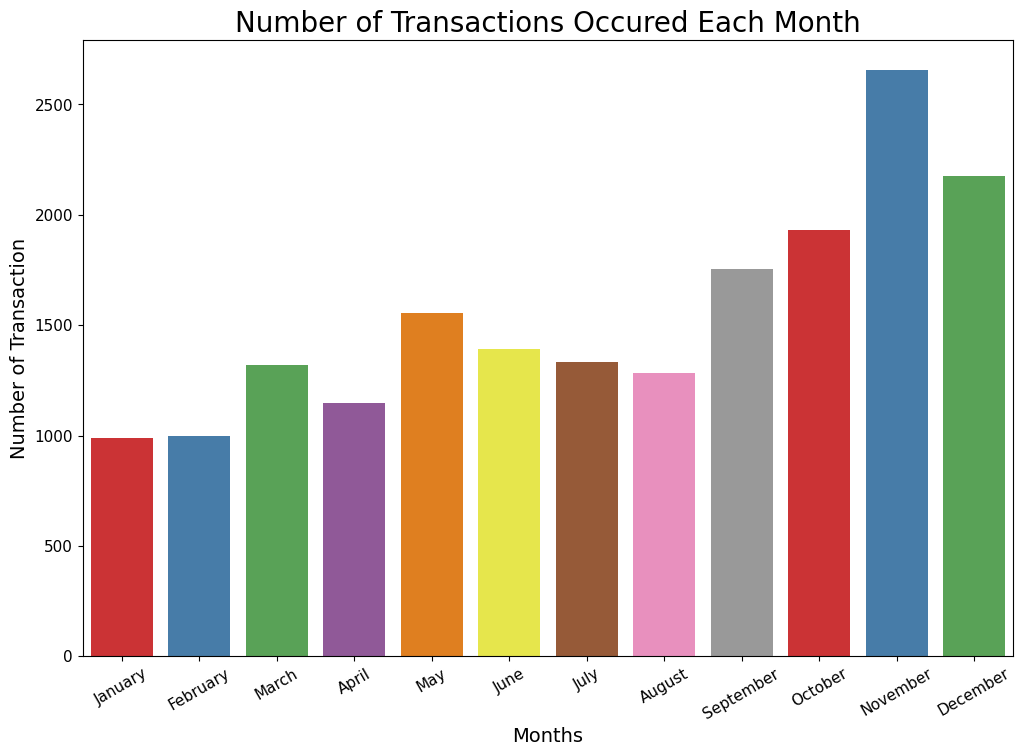

In [64]:
order_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_month.reset_index(), palette = "Set1")
ax.set_title('Number of Transactions Occured Each Month', size = 20)
ax.set_xlabel('Months', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 30)
plt.show()

### Orders per days

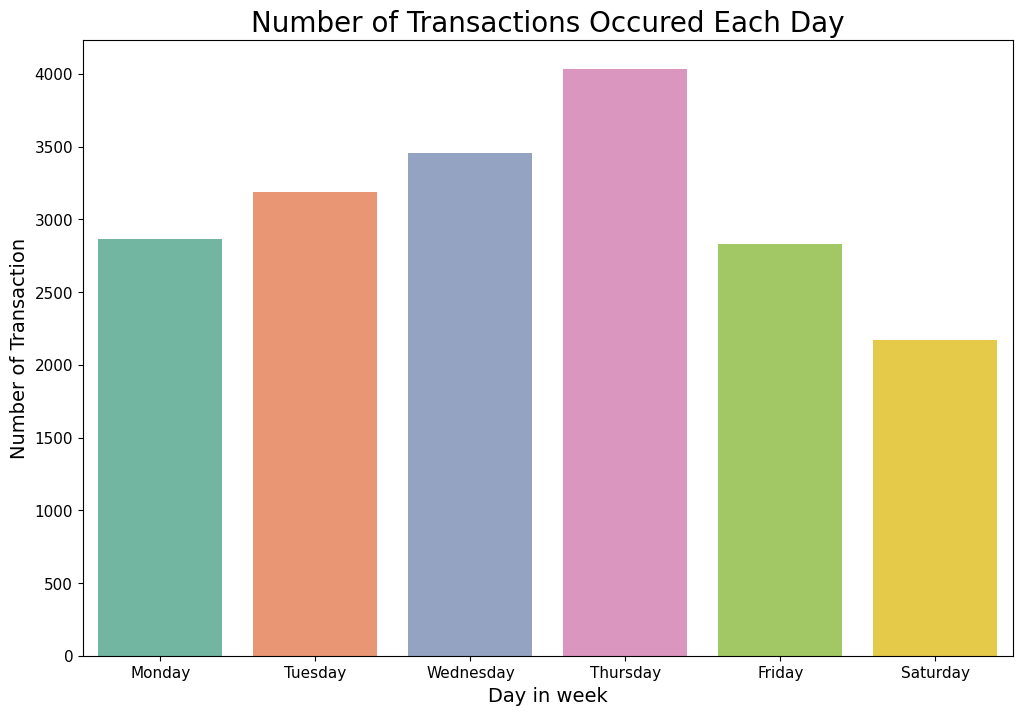

In [65]:
order_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(), palette = "Set2")
ax.set_title('Number of Transactions Occured Each Day', size = 20)
ax.set_xlabel('Day in week', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

### Orders per hours

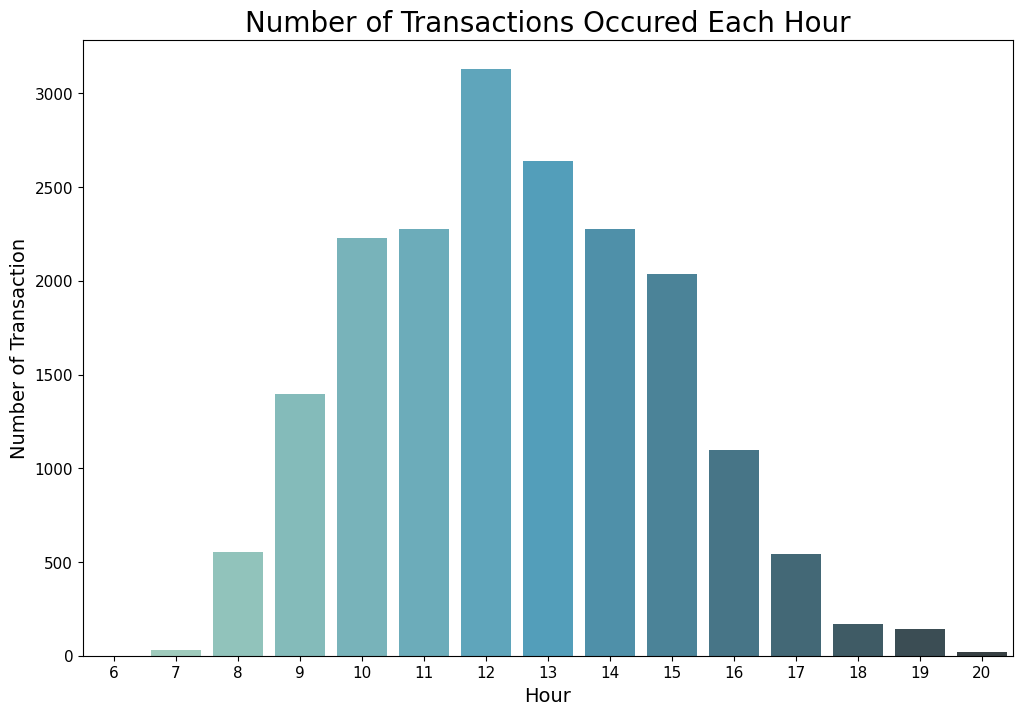

In [33]:
order_hour = df.groupby(df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_hour.reset_index(), palette = "GnBu_d")
ax.set_title('Number of Transactions Occured Each Hour', size = 20)
ax.set_xlabel('Hour', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25b0a650fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x25b0a65f730>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b0a650c40>],
 'medians': [<matplotlib.lines.Line2D at 0x25b0a65fe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b0a669220>],
 'means': []}

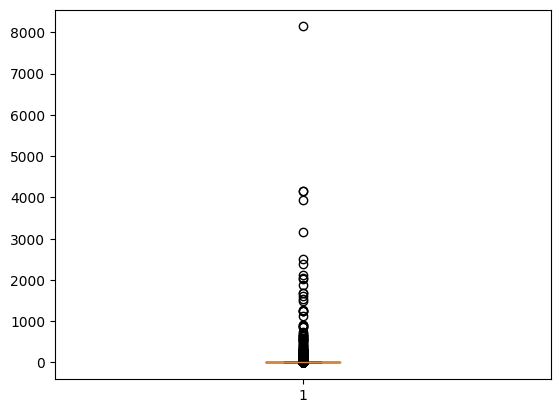

In [34]:
plt.boxplot(df['UnitPrice'])

### Country Wise Analysis

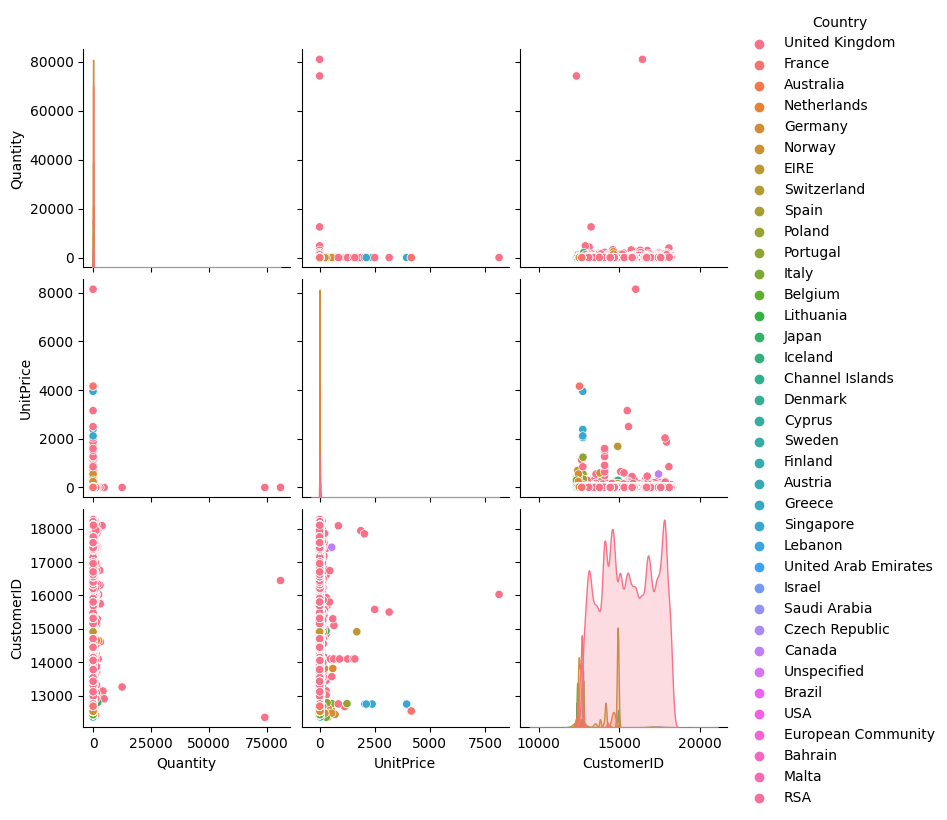

In [35]:
sns.pairplot(df, hue='Country')

### 5 most money spender customer

In [36]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


{'whiskers': [<matplotlib.lines.Line2D at 0x25b0d5de5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x25b0d5ded00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b0d5de250>],
 'medians': [<matplotlib.lines.Line2D at 0x25b0d5e8460>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b0d5e87f0>],
 'means': []}

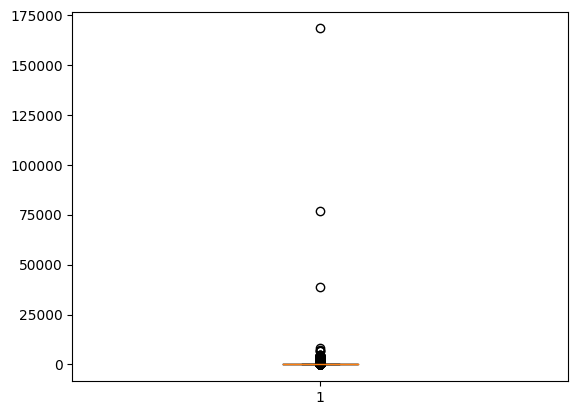

In [37]:
plt.boxplot(df['TotalPrice'])

<AxesSubplot:>

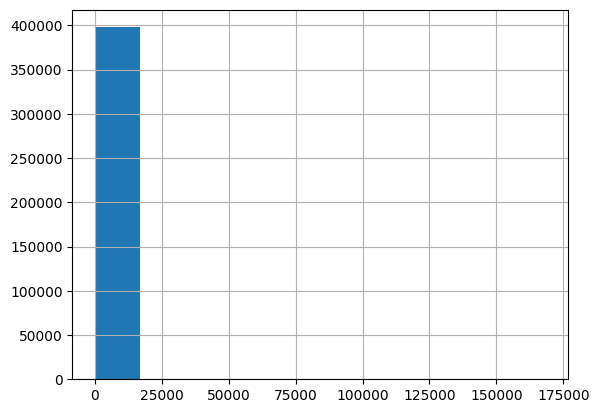

In [38]:
df['TotalPrice'].hist()

### Most frequent customers

In [39]:
price_cust = pd.pivot_table(df, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('The following are 5 customers who spend the most money on Online Retail:')
price_cust.sort_values('TotalPrice', ascending=False)[:5]

The following are 5 customers who spend the most money on Online Retail:


,TotalPrice
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06


In [40]:
order_cust = pd.pivot_table(df, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('The following are the 5 customers who most frequently shop at Online Retail:')
order_cust.sort_values('InvoiceNo', ascending=False)[:5]

The following are the 5 customers who most frequently shop at Online Retail:


,InvoiceNo
CustomerID,
12748,210
14911,201
17841,124
13089,97
14606,93


### Time Cohorts

In [41]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [42]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [43]:
group = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group.transform('min')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01


In [44]:
def date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [46]:
invoice_year, invoice_month, _ = date(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = date(df, 'CohortMonth')

In [47]:
diff_year = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

In [48]:
df['IndexTime'] = diff_year*12 + diff_month + 1
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5


In [49]:
count_cohort_time = df.groupby(['CohortMonth', 'IndexTime'])['CustomerID'].apply(pd.Series.nunique)
count_cohort_time = count_cohort_time.reset_index()
cohort_time_table = count_cohort_time.pivot(index='CohortMonth', columns='IndexTime', values='CustomerID')
cohort_time_table

IndexTime,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Customer Retention Rate**

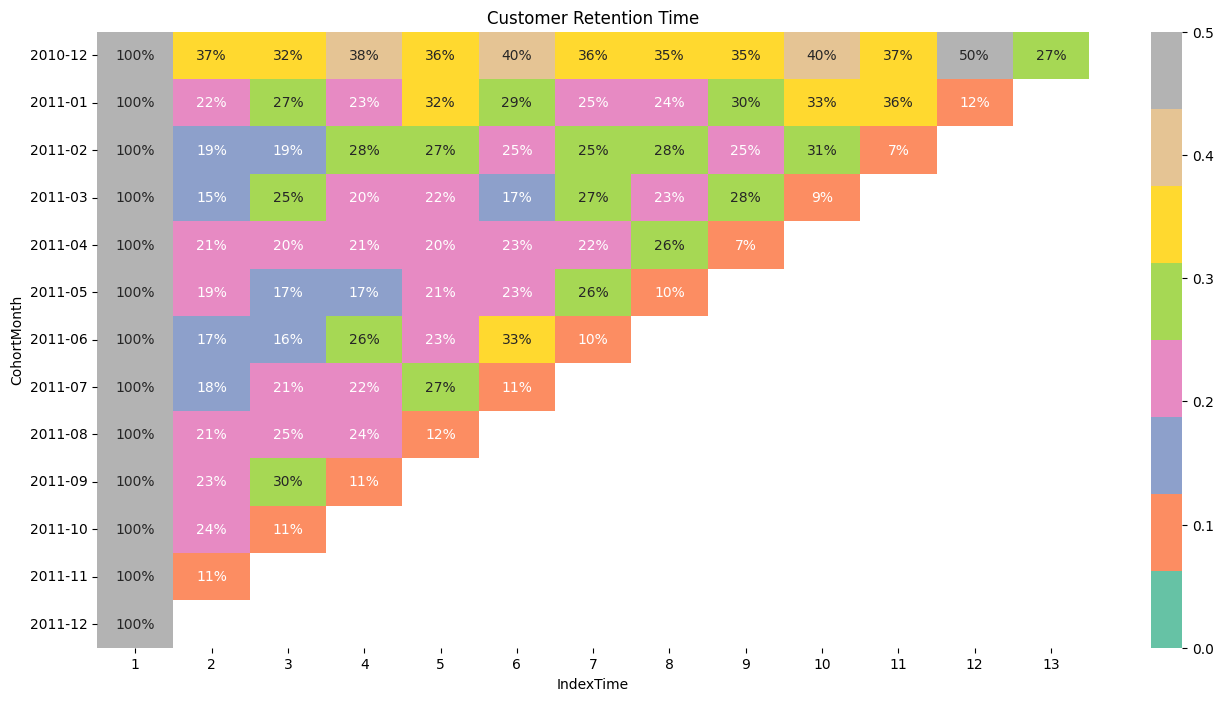

In [58]:
cohort_size = cohort_time_table.iloc[:,0]
retention = cohort_time_table.divide(cohort_size, axis = 0)
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize= (16,8))
ax = sns.heatmap(data = retention, annot = True, annot_kws={"size":10}, vmin = 0.0, vmax = 0.5, fmt = '.0%', cmap = 'Set2')
plt.title('Customer Retention Time')
plt.show()


In [59]:
print('Min: {}\nMax: {}'.format(min(df['InvoiceDate']), max(df['InvoiceDate'])))

Min: 2010-12-01 08:26:00
Max: 2011-12-09 12:50:00


In [60]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [61]:
analysis_date = max(df['InvoiceDate']) + dt.timedelta(days= 1)
print((analysis_date).date())

2011-12-10


In [62]:
rfm_cust = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
rfm_cust.rename(columns= {'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'}, inplace = True)
rfm_cust

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05
